In [2]:
import pandas as pd
import numpy as np

1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.

In [3]:
claim=pd.read_csv("claims.csv")
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [5]:
cust=pd.read_csv("cust_demographics.csv")
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [7]:
claim.shape , cust.shape

((1100, 10), (1085, 6))

In [8]:
df=pd.merge(cust,claim,left_on="CUST_ID",right_on="customer_id",how="inner").drop("customer_id",axis=1)
df.shape

(1085, 15)

In [9]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [10]:
df.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [11]:
df.CUST_ID=df.CUST_ID.astype(object)
df.dtypes

CUST_ID                 object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [12]:
df["DateOfBirth"] = pd.to_datetime(df.DateOfBirth, format = "%d-%b-%y")
df["DateOfBirth"]

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   2064-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [13]:
df.loc[(df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=df[df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [14]:
df["DateOfBirth"]

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [15]:
df["claim_date"] = pd.to_datetime(df.claim_date, format = "%m/%d/%Y")
df["Contact"] = pd.to_numeric(df.Contact.str.replace("-",""))
df["claim_amount"] = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [16]:
df.dtypes

CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.


In [17]:
df["flag"] = np.where(df.police_report == "No", 0 ,
                    np.where(df.police_report == "Yes", 1, np.nan))

In [18]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN


In [19]:
df.drop(columns = ["police_report"], inplace = True)
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN


In [20]:
c1=df.CUST_ID.value_counts()

In [21]:
c1=c1.to_frame()
c1.loc[c1["CUST_ID"]>1]

,CUST_ID
84147585,2
21831191,2
19269962,2
53539195,2
85357756,2
47830476,2
30308357,2


In [22]:
df=df.sort_values(by="claim_date",ascending=False).reset_index().drop("index",axis=1)

In [23]:
df.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,93915431,Male,1967-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,Material and injury,42124.5,1.0,Yes,0.0
1,38011078,Female,1976-05-20,NE,2711231475,Gold,98795403,Crime,2018-10-30,Auto,Material only,1940.0,1.0,No,NaN


In [24]:
df=df[~df.CUST_ID.duplicated()]

In [25]:
df.loc[df["CUST_ID"]==85357756]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
206,85357756,Male,1970-01-02,PA,9156983649,Platinum,1654201,Driver error,2018-06-23,Auto,Material only,2510.0,1.0,No,NaN


In [26]:
df.shape

(1078, 15)

6. Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)

In [27]:
df.Contact=df.Contact.astype(object)
df.claim_id=df.claim_id.astype(object)

In [28]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

In [29]:
num.head()
num.dtypes

claim_amount           float32
total_policy_claims    float64
flag                   float64
dtype: object

In [30]:
cat.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,fraudulent
0,93915431,Male,1967-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,Material and injury,Yes
1,38011078,Female,1976-05-20,NE,2711231475,Gold,98795403,Crime,2018-10-30,Auto,Material only,No
2,58451506,Male,1968-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,Material only,No
3,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,Material only,No
4,77510822,Female,1986-03-18,AK,4369347156,Silver,87329176,Other driver error,2018-10-30,Auto,Material only,No


In [31]:
cat.isnull().sum()

CUST_ID           0
gender            0
DateOfBirth       0
State             0
Contact           0
Segment           0
claim_id          0
incident_cause    0
claim_date        0
claim_area        0
claim_type        0
fraudulent        0
dtype: int64

In [32]:
num=num.drop("flag",axis=1)

In [33]:
num.isnull().sum()

claim_amount           65
total_policy_claims    10
dtype: int64

In [34]:
for col in num:
    df[col]=df[col].fillna(df[col].mean())

In [35]:
df.isnull().sum()

CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
incident_cause           0
claim_date               0
claim_area               0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
flag                   294
dtype: int64

In [36]:
df.flag.mode()[0]

0.0

In [37]:
df["flag"]=df["flag"].fillna(df["flag"].mode())

In [38]:
df.flag.isnull().sum()

294

7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60


In [39]:
df["Age"]=round((df["claim_date"]-df["DateOfBirth"]).apply(lambda x:x.days)/365.25,1)

In [40]:
from numpy import where as iff
df["Age_grp"] = iff(df.Age < 18, "Children",
                        iff(df.Age < 30, "Youth",
                         iff(df.Age < 60, "Adult",
                          iff(df.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )

In [41]:
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,93915431,Male,1967-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,Material and injury,42124.500000,1.0,Yes,0.0,51.1,Adult
1,38011078,Female,1976-05-20,NE,2711231475,Gold,98795403,Crime,2018-10-30,Auto,Material only,1940.000000,1.0,No,NaN,42.4,Adult
2,58451506,Male,1968-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,Material only,2420.000000,1.0,No,0.0,50.5,Adult
3,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,Material only,1830.000000,1.0,No,0.0,41.5,Adult
4,77510822,Female,1986-03-18,AK,4369347156,Silver,87329176,Other driver error,2018-10-30,Auto,Material only,12501.730469,2.0,No,NaN,32.6,Adult


In [42]:
df.Age_grp.mode()[0]

'Adult'

In [43]:
df.Age_grp.isnull().sum()

0

8. What is the average amount claimed by the customers from various
segments?

In [44]:
df.groupby(["Segment"])["claim_amount"].mean().round()

Segment
Gold        12846.0
Platinum    12372.0
Silver      12268.0
Name: claim_amount, dtype: float32

9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

In [45]:
df.loc[df["claim_date"]<"2018-09-10"]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
91,98401399,Female,1968-10-07,IA,2195931674,Silver,35136402,Natural causes,2018-09-06,Auto,Injury only,24900.0,1.0,No,NaN,49.9,Adult
92,76339681,Female,1990-03-08,MI,8435293256,Platinum,70575561,Crime,2018-09-06,Home,Material only,1910.0,1.0,No,NaN,28.5,Youth
93,75884493,Female,1969-07-27,VT,1964357259,Gold,3110549,Other driver error,2018-09-06,Auto,Material and injury,35310.0,6.0,No,1.0,49.1,Adult
94,7612094,Male,1983-08-26,UT,1457344176,Gold,75623323,Natural causes,2018-09-06,Auto,Material only,2771.5,1.0,Yes,0.0,35.0,Adult
95,39959491,Female,1995-04-07,DE,1397425417,Silver,54642809,Driver error,2018-09-06,Auto,Material only,2720.0,1.0,No,NaN,23.4,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,6495928793,Platinum,61374372,Other causes,2017-01-01,Auto,Material and injury,20200.0,1.0,No,0.0,17.4,Children
1081,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,Injury only,27670.0,1.0,No,0.0,23.4,Youth
1082,64840478,Female,1974-02-14,NM,9181747461,Silver,23636125,Other driver error,2017-01-01,Auto,Material and injury,17290.0,1.0,No,NaN,42.9,Adult
1083,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,Material only,2080.0,1.0,No,0.0,31.1,Adult


In [46]:
df.loc[df["claim_date"]<"2018-09-10"].groupby(["incident_cause"])[["claim_amount"]].sum().add_prefix("total_")

,total_claim_amount
incident_cause,
Crime,721938.625
Driver error,3315850.750
Natural causes,1312987.125
Other causes,3723152.000
Other driver error,3277536.500


10. How many adults from TX, DE and AK claimed insurance for driver
related issues and causes? 

In [47]:
df1=df.loc[(((df.State == "TX") | (df.State == "DE") | (df.State == "AK")) & (df.incident_cause.str.lower().str.contains("driver")))]

In [48]:
df2=df1.loc[df["Age_grp"]=="Adult",:]

In [49]:
df2.groupby(["State","incident_cause"])[["State"]].count().add_prefix("no.adults_")

no.adults_State
State incident_cause                     
AK    Driver error                      5
      Other driver error                3
DE    Driver error                      4
      Other driver error                5
TX    Driver error                      3
      Other driver error                3

11. Draw a pie chart between the aggregated value of claim amount based
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

In [50]:
df3=df.pivot_table(index="gender",columns="Segment",values="claim_amount")
df3

Segment,Gold,Platinum,Silver
gender,,,
Female,12339.442383,12278.352539,11641.379883
Male,13279.849609,12478.841797,12825.871094


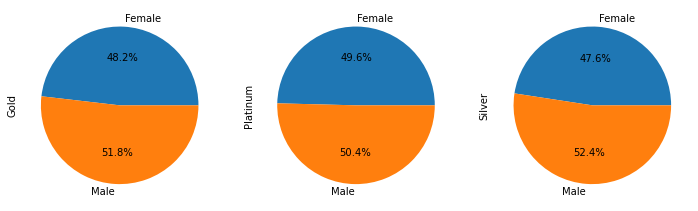

In [51]:
import matplotlib.pyplot as plt
df3.plot(kind = "pie", subplots = True, autopct="%1.1f%%",legend = False, figsize = (12,6))
plt.show()

12. Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart

In [52]:
df4=df.loc[df.incident_cause.str.lower().str.contains("driver"),:].groupby("gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
df4

,gender,CountOf_gender
0,Female,221
1,Male,281


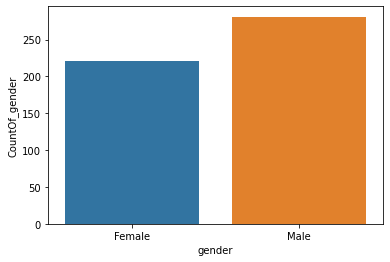

In [53]:
import seaborn as sns
sns.barplot(x = "gender", y = "CountOf_gender", data = df4 )
plt.show()

13. Which age group had the maximum fraudulent policy claims? Visualize
it on a bar chart.

In [54]:
fc=df.loc[df["fraudulent"]=="Yes"]
fc1=fc.groupby("Age_grp")[["Age_grp"]].count().add_prefix("count of ")
fc1

,count of Age_grp
Age_grp,
Adult,171
Children,1
Youth,73


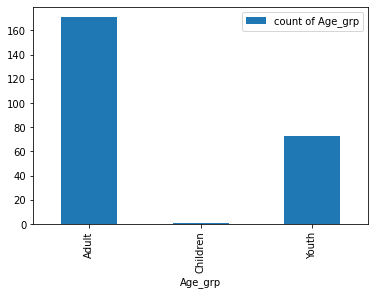

In [59]:
fc1.plot(kind="bar")
plt.show()

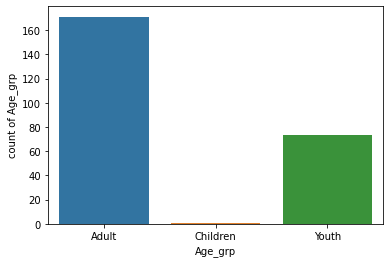

In [60]:
sns.barplot(x = fc1.index, y = "count of Age_grp", data = fc1 )
plt.show()

14. Visualize the monthly trend of the total amount that has been claimed
by the customers. Ensure that on the “month” axis, the month is in a
chronological order not alphabetical order. 

In [57]:
df["mnthly"]=df["claim_date"].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
df["yearly"]=df["claim_date"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [58]:
df["mnthly"].dtypes

dtype('O')

In [172]:
mc=df.groupby(["mnthly","yearly"])[["claim_amount"]].sum().reset_index()
mc
mc.sort_values("mnthly")

,mnthly,yearly,claim_amount
0,April,2017,747975.75000
1,April,2018,544538.25000
2,August,2017,431616.46875
3,August,2018,479680.71875
4,December,2017,694252.75000
5,February,2017,631456.43750
6,February,2018,533085.93750
7,January,2017,608016.18750
8,January,2018,719154.43750
10,July,2018,588447.12500


15. What is the average claim amount for gender and age categories and
suitably represent the above using a facetted bar chart, one facet that
represents fraudulent claims and the other for non-fraudulent claims.


In [174]:
fn=df.groupby(["fraudulent","gender","Age_grp"])[["claim_amount"]].sum().reset_index()
fn

,fraudulent,gender,Age_grp,claim_amount
0,No,Female,Adult,3.403034e+06
1,No,Female,Children,2.242000e+04
2,No,Female,Youth,1.559759e+06
3,No,Male,Adult,3.689114e+06
4,No,Male,Children,9.046000e+04
5,No,Male,Youth,1.535926e+06
6,Yes,Female,Adult,1.118405e+06
7,Yes,Female,Youth,2.736934e+05
8,Yes,Male,Adult,1.377981e+06
9,Yes,Male,Children,3.240700e+04


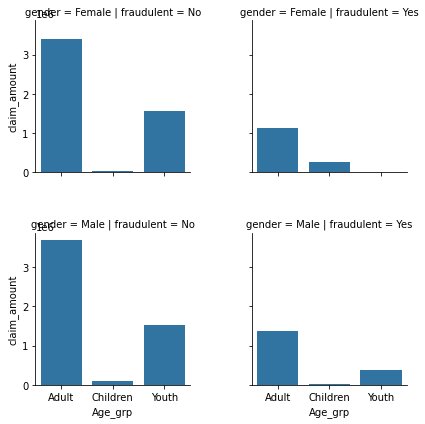

In [179]:
g=sns.FacetGrid(fn,col="fraudulent",row="gender",col_order=["No","Yes"],row_order=["Female","Male"])
g.map(sns.barplot,"Age_grp","claim_amount")
plt.subplots_adjust(hspace=0.4, wspace=0.4)

16. Is there any similarity in the amount claimed by males and females?

In [181]:
m=df[df["gender"]=="Male"]
f=df[df["gender"]=="Female"]

In [182]:
from scipy.stats import ttest_ind
t,p=ttest_ind(m.claim_amount,f.claim_amount)
t,p

(0.962509235557727, 0.3360101161075433)

17. Is there any relationship between age category and segment?

In [183]:
tab = pd.crosstab(df.Segment, df.Age_grp, margins = True)
tab

Age_grp,Adult,Children,Youth,All
Segment,,,,
Gold,262,3,106,371
Platinum,242,4,115,361
Silver,243,0,103,346
All,747,7,324,1078


In [184]:
from scipy.stats import chi2_contingency
x1 = chi2_contingency(tab)
x1

(4.635619754223588,
 0.8648459595354282,
 9,
 array([[ 257.08441558,    2.40909091,  111.50649351,  371.        ],
        [ 250.15491651,    2.34415584,  108.50092764,  361.        ],
        [ 239.7606679 ,    2.24675325,  103.99257885,  346.        ],
        [ 747.        ,    7.        ,  324.        , 1078.        ]]))

In [185]:
print("The chi square stat is {} and the p value is {}".format(x1[0],x1[1]))

The chi square stat is 4.635619754223588 and the p value is 0.8648459595354282


18. The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.

In [186]:
df.yearly.value_counts()

2017    593
2018    485
Name: yearly, dtype: int64

In [187]:
q=df.loc[df["yearly"]=="2018"]
q.claim_amount.mean()

12743.4345703125

In [188]:
from scipy.stats import ttest_1samp
t,p=ttest_1samp(q.claim_amount,10000)
t,p

(4.477346657115039, 9.435712980259601e-06)

In [189]:
print('t-score =%.2f, p-value =%.3f' % (t, p))
if p > 0.05:
    print('Accepting H0')
else:
    print('Reject H0')

t-score =4.48, p-value =0.000
Reject H0


19. Is there any difference between age groups and insurance claims?

In [190]:
tab1 = pd.crosstab(df.claim_type, df.Age_grp, margins = True)
tab1

Age_grp,Adult,Children,Youth,All
claim_type,,,,
Injury only,127,2,65,194
Material and injury,182,3,52,237
Material only,438,2,207,647
All,747,7,324,1078


In [191]:
from scipy.stats import chi2_contingency
x2 = chi2_contingency(tab1)
x2

(12.316816270636131,
 0.19603221136600343,
 9,
 array([[ 134.432282  ,    1.25974026,   58.30797774,  194.        ],
        [ 164.22912801,    1.53896104,   71.23191095,  237.        ],
        [ 448.33858998,    4.2012987 ,  194.46011132,  647.        ],
        [ 747.        ,    7.        ,  324.        , 1078.        ]]))

In [192]:
print("The chi square stat is {} and the p value is {}".format(x2[0],x2[1]))

The chi square stat is 12.316816270636131 and the p value is 0.19603221136600343


20. Is there any relationship between total number of policy claims and the
claimed amount?

In [193]:
print(np.corrcoef(df.total_policy_claims, df.claim_amount))

[[ 1.         -0.02190949]
 [-0.02190949  1.        ]]


In [195]:
from scipy.stats import kurtosis, skew, stats
print(stats.pearsonr(df.total_policy_claims, df.claim_amount))

(-0.021909488060697424, 0.472384985815484)
